# Multilayer perceptron
## MNIST  handwritten digits example
#### Black and white images of hand

In [1]:
# Download Mnist
# https://drive.google.com/file/d/1Aw_60I-PxSjzsrWlrQcyDQ1TDXIWaV6z/view?usp=sharing
# need to upload this file in colab
import os
import sys

# !gdown https://drive.google.com/uc?id=1Aw_60I-PxSjzsrWlrQcyDQ1TDXIWaV6z
mnist_file_directory = os.getcwd() # current directory
# Specify the location of the Mnist file
sys.path.append(mnist_file_directory)

In [2]:
# Download Mnist data and load
# and then place them into training and testing sets
from mnist import load_mnist
(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
### print shape to see how the data looks like
print("Train data shape: ", X_train.shape) # 784 = 28 X 28 pixel  60000 samples
print("Train label shape: ", y_train.shape)
print("Test data shape: ", X_test.shape) # 784 = 28 X 28 pixel   10000 sampels
print("Test label shape: ", y_test.shape)

Train data shape:  (60000, 784)
Train label shape:  (60000, 10)
Test data shape:  (10000, 784)
Test label shape:  (10000, 10)


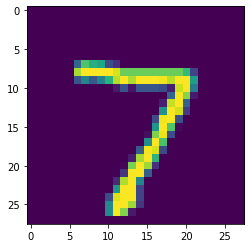

In [4]:
# plot the data 

import matplotlib.pylab as plt
plt.imshow(X_test[0].reshape(28, 28))

# Make a multilayer perceptron using Keras

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# from keras.optimizers import adam
from tensorflow import keras

In [6]:
num_classes = y_train.shape[1]
num_pixels = X_train.shape[1]

print("count of class: ", num_classes)
print("number of pixels", num_pixels)

count of class:  10
number of pixels 784


In [7]:
model = Sequential()
first_layer_weight_count = 20 # number of units for the hidden layers
### Making the network
model = Sequential([Dense(first_layer_weight_count, input_dim=num_pixels,  activation='relu'),
                    Dense(num_classes, input_dim=first_layer_weight_count, activation='softmax')
])

### Setting how the model will learn the examples
opt = keras.optimizers.Adam(learning_rate=0.001)
# opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [8]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit data to model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50


2022-05-18 22:42:17.847271: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 566us/step - loss: 0.4137 - accuracy: 0.8830 - val_loss: 0.2551 - val_accuracy: 0.9290
Epoch 2/50
1875/1875 [==============================] - 1s 487us/step - loss: 0.2336 - accuracy: 0.9325 - val_loss: 0.2104 - val_accuracy: 0.9372
Epoch 3/50
1875/1875 [==============================] - 1s 490us/step - loss: 0.1873 - accuracy: 0.9458 - val_loss: 0.1780 - val_accuracy: 0.9478
Epoch 4/50
1875/1875 [==============================] - 1s 493us/step - loss: 0.1630 - accuracy: 0.9521 - val_loss: 0.1602 - val_accuracy: 0.9534
Epoch 5/50
1875/1875 [==============================] - 1s 497us/step - loss: 0.1450 - accuracy: 0.9566 - val_loss: 0.1499 - val_accuracy: 0.9544
Epoch 6/50
1875/1875 [==============================] - 1s 520us/step - loss: 0.1331 - accuracy: 0.9607 - val_loss: 0.1405 - val_accuracy: 0.9546
Epoch 7/50
1875/1875 [==============================] - 1s 493us/step - loss: 0.1235 - accuracy: 0.9630 - val_loss: 0.1368 - val_accura

In [12]:
print(history.history.keys())
print("____________________________________"*3)
print("loss: ", history.history["loss"])
print("____________________________________"*3)
print("accuracy: ", history.history["accuracy"])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
____________________________________________________________________________________________________________
loss:  [0.4136977195739746, 0.23364298045635223, 0.18727050721645355, 0.16300426423549652, 0.1450118124485016, 0.13308800756931305, 0.12345116585493088, 0.11567412316799164, 0.10976298153400421, 0.10445213317871094, 0.10025192052125931, 0.09584850817918777, 0.09201568365097046, 0.08858706057071686, 0.0864744558930397, 0.08328107744455338, 0.08103763312101364, 0.07828915119171143, 0.07612482458353043, 0.0743749588727951, 0.0726572573184967, 0.07092645764350891, 0.06915992498397827, 0.06812184303998947, 0.06637482345104218, 0.06464480608701706, 0.06344309449195862, 0.06198321282863617, 0.06057831645011902, 0.05987543985247612, 0.05862381309270859, 0.05750740319490433, 0.05567599833011627, 0.05501784011721611, 0.05483037233352661, 0.053247492760419846, 0.05304747074842453, 0.05243143066763878, 0.05070093274116516, 0.050146

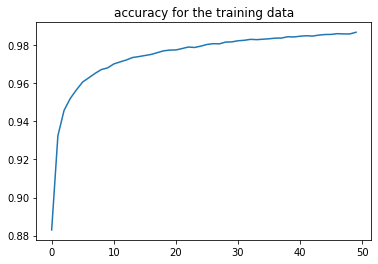

In [13]:
plt.title("accuracy for the training data")
plt.plot(history.history["accuracy"])

model predict:  [1]


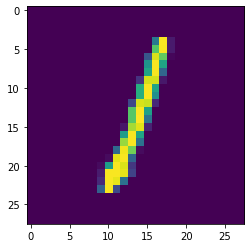

In [14]:
# show first data
import matplotlib.pylab as plt
plt.imshow(X_test[7000].reshape(28, 28))

print("model predict: ", np.argmax(model.predict(X_test[7000:7001]), axis=1))

Model evaluation - test data

In [15]:
predicts = np.argmax(model.predict(X_test), axis=1)
labels = np.argmax(y_test, axis=1)

accuracy = sum(predicts == labels) / len(predicts)

print(accuracy)

0.9566


In [16]:
model.predict(X_test)

array([[9.8246000e-10, 5.3469826e-11, 9.5767936e-09, ..., 9.9224585e-01,
        4.8926082e-05, 2.0095640e-05],
       [5.1747981e-12, 5.7498250e-13, 1.0000000e+00, ..., 6.5022192e-21,
        1.4767581e-14, 3.1559575e-30],
       [5.0490737e-08, 9.9800080e-01, 7.3561753e-04, ..., 6.7522247e-05,
        1.1393391e-03, 2.0701291e-06],
       ...,
       [1.5289321e-13, 1.5538225e-15, 7.6895661e-18, ..., 8.2316935e-09,
        4.0433981e-04, 3.5224543e-03],
       [1.5856533e-11, 6.4973595e-17, 2.4895444e-15, ..., 8.7295736e-13,
        1.2022334e-04, 1.3083915e-19],
       [3.6107152e-13, 5.2184944e-25, 3.3998960e-12, ..., 2.7349984e-21,
        4.6582227e-10, 5.4946634e-11]], dtype=float32)